# Librerías necesarias


In [ ]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Red neuronal para clasificación

## Preprocesado del Dataset

### Introducción

El Dataset ha sido extraído de kaggle, tenemos datos médicos sobre personas que han sufrido o no un infarto.</br>
Contamos con la siguientes columnas:</br></br>

Age : Edad del paciente

Sex : Sexo del paciente

trtbps : Presión arterial en descanso (en mmHg)

chol : Colesterol en mg/dl medido por un sensor de IMC

thalachh : Ritmo cardiaco máximo conseguido durante prueba de estrés

oldpeak: Depresión de onda ST inducida por ejercicio en descanso

caa: Número de vasos principales del corazón coloreados por fluoroscopia (0-4)

exang: Aparece angina inducida por el ejercicio
*  Valor 0: No
*  Valor 1: Si

cp : Tipo de dolor en el pecho
*  Valor 0: angina típica
*  Valor 1: angina atípica
*  Valor 2: dolor no anginal
*  Valor 3: asintomático

fbs : Nivel de azucar en sangre en ayuno
*  Valor 0: < 120 mg/dl
*  Valor 1: > 120 mg/dl

thall : Resultado de prueba de esfuerzo con Talio
* Valor 1: Defecto arreglado
* Valor 2: Normal
* Valor 3: Defecto reversible

rest_ecg : Resultado de electrocardiograma en reposo
*   Valor 0: normal
*   Valor 1: muestra anormalidades en el patron de onda ST-T (inversiones de onda T y/o elevación o depresión ST de > 0.05 mV)
* Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva, por el criterio de Estes

slp :  Pendiente mostrada por la onda ST durante electrocardiograma en prueba de esfuerzo
* Valor 0: Auge
* Valor 1: Plana
* Valor 2: Declive

target :
*   0 = menor posibilidad de infarto
*   1 = mayor posibilidad de infarto


### Importamos el dataset

In [ ]:
pd.set_option('display.max_columns', None)
heart=pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Manejo de datos missing

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
len(heart)

303

Como podemos observar, de forma natural no hay valores missings en nuestro dataset.

### Manejar datos categóricos

En el caso de mi dataset, las variables categóricas ya vienen codificadas en valores numéricos, sin embargo, voy a volver a codificarlas como categóricas, para demostrar cuál sería el proceso a seguir.

El primer paso a seguir es identificar las variables categóricas, las cuales son:


*   Sex
*   cp
* rest_ecg
* thall

Vamos a aprovechar, que con las variables cp y rest_ecg, es correcto utilizar la codificación one-hot, para demostrar cuál sería el proceso a seguir, en caso de tener que codificar variables categóricas como numéricas:



In [ ]:
heart_categoricas = heart.copy()

heart_categoricas['cp'].replace([0, 1, 2, 3],
                        ['típica', 'atípica', 'no_anginal', 'asintomático'], inplace=True)
heart_categoricas['restecg'].replace([0, 1, 2],
                        ['normal', 'anormalidades_patron_onda_ST-T', 'hipertrofia_ventricular_izquierda'], inplace=True)
heart_categoricas['slp'].replace([0, 1, 2],
                        ['auge', 'plana', 'declive'], inplace=True)
heart_categoricas['thall'].replace([1, 2, 3],
                        ['defecto_arreglado', 'normal', 'defecto_reversible'], inplace=True)
heart_categoricas.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asintomático,145,233,1,normal,150,0,2.3,auge,0,defecto_arreglado,1
1,37,1,no_anginal,130,250,0,anormalidades_patron_onda_ST-T,187,0,3.5,auge,0,normal,1
2,41,0,atípica,130,204,0,normal,172,0,1.4,declive,0,normal,1
3,56,1,atípica,120,236,0,anormalidades_patron_onda_ST-T,178,0,0.8,declive,0,normal,1
4,57,0,típica,120,354,0,anormalidades_patron_onda_ST-T,163,1,0.6,declive,0,normal,1


A continuación, conseguimos los dummies de las variables

In [ ]:
dummy_cp = pd.get_dummies(heart_categoricas["cp"], prefix="cp")
dummy_restecg = pd.get_dummies(heart_categoricas["restecg"], prefix="restecg")
dummy_slp = pd.get_dummies(heart_categoricas["slp"], prefix="slp_pendiente")
dummy_thall = pd.get_dummies(heart_categoricas["thall"], prefix="thall")

Este es el ejemplo de como quedaría una de nuestras variables, con codifcación one hot

In [ ]:
dummy_cp.head(10)

,cp_asintomático,cp_atípica,cp_no_anginal,cp_típica
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,True,False,False
4,False,False,False,True
5,False,False,False,True
6,False,True,False,False
7,False,True,False,False
8,False,False,True,False
9,False,False,True,False


Una vez hecho eso, eliminamos de nuestro dataframe original las columnas correspondientes a esas variables, las reemplazamos por el dataframe que hemos creado con la codifiación one-hot ya realizada

In [ ]:
heart_categoricas = heart_categoricas.drop(['cp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_cp], axis = 1)
heart_categoricas = heart_categoricas.drop(['restecg'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_restecg], axis = 1)
heart_categoricas = heart_categoricas.drop(['slp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_slp], axis = 1)
heart_categoricas = heart_categoricas.drop(['thall'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_thall], axis = 1)

In [ ]:
heart_categoricas.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_asintomático,cp_atípica,cp_no_anginal,cp_típica,restecg_anormalidades_patron_onda_ST-T,restecg_hipertrofia_ventricular_izquierda,restecg_normal,slp_pendiente_auge,slp_pendiente_declive,slp_pendiente_plana,thall_0,thall_defecto_arreglado,thall_defecto_reversible,thall_normal
0,63,1,145,233,1,150,0,2.3,0,1,True,False,False,False,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,False,False,True,False,True,False,False,True,False,False,False,False,False,True
2,41,0,130,204,0,172,0,1.4,0,1,False,True,False,False,False,False,True,False,True,False,False,False,False,True
3,56,1,120,236,0,178,0,0.8,0,1,False,True,False,False,True,False,False,False,True,False,False,False,False,True
4,57,0,120,354,0,163,1,0.6,0,1,False,False,False,True,True,False,False,False,True,False,False,False,False,True


### Estandarizacion y normalizacion de los datos

Para empezar, vamos a mostrar todas nuestras variables de forma gráfica, y así estudiar su distribución

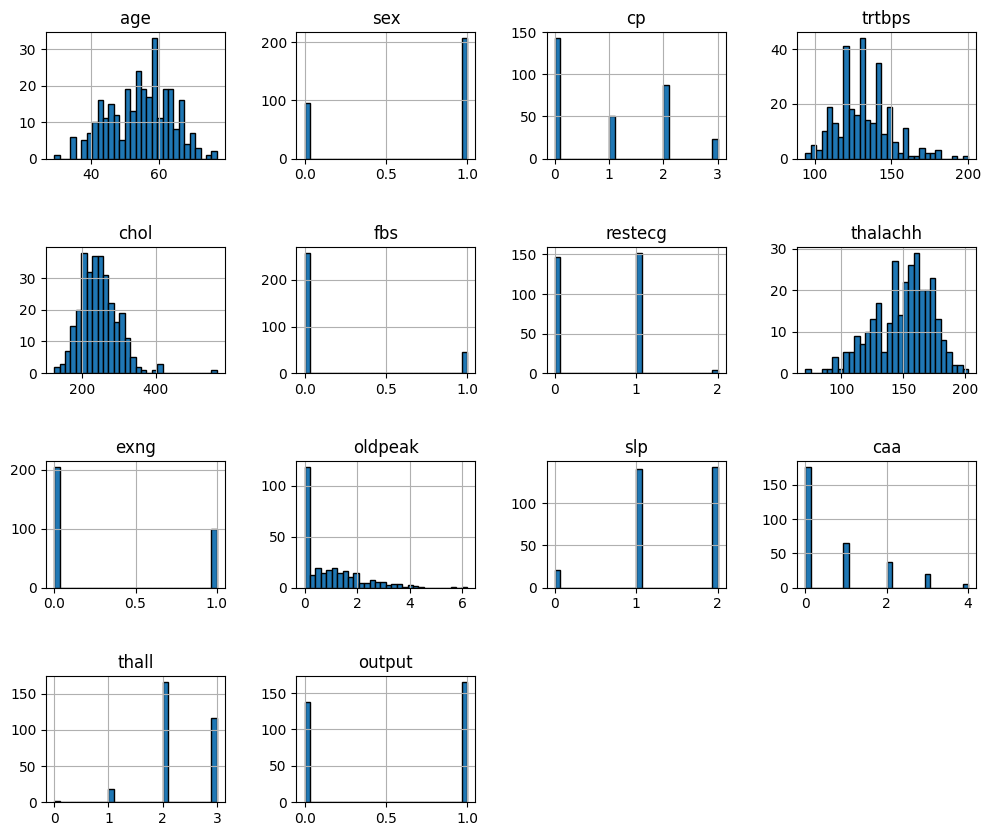

In [ ]:
heart.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Y vamos a mostrar la medida de skewness y kurtosis de todas nuestras variables

In [ ]:
cols = heart.columns
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % heart[c].skew())
    print("Kurtosis: %f" % heart[c].kurt())

------age------
Skewness: -0.202463
Kurtosis: -0.542167
------sex------
Skewness: -0.791335
Kurtosis: -1.382961
------cp------
Skewness: 0.484732
Kurtosis: -1.193071
------trtbps------
Skewness: 0.713768
Kurtosis: 0.929054
------chol------
Skewness: 1.143401
Kurtosis: 4.505423
------fbs------
Skewness: 1.986652
Kurtosis: 1.959678
------restecg------
Skewness: 0.162522
Kurtosis: -1.362673
------thalachh------
Skewness: -0.537410
Kurtosis: -0.061970
------exng------
Skewness: 0.742532
Kurtosis: -1.458317
------oldpeak------
Skewness: 1.269720
Kurtosis: 1.575813
------slp------
Skewness: -0.508316
Kurtosis: -0.627521
------caa------
Skewness: 1.310422
Kurtosis: 0.839253
------thall------
Skewness: -0.476722
Kurtosis: 0.297915
------output------
Skewness: -0.179821
Kurtosis: -1.980783


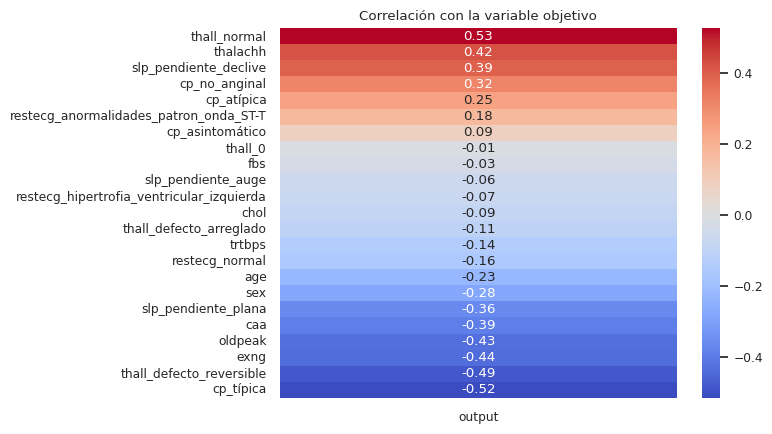

In [ ]:
corr = heart_categoricas.corr()
target_corr = corr['output'].drop('output')

# Ponemos los valores de correlacion en orden descendente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlación con la variable objetivo')
plt.show()

Realizamos las transformaciones que mejoran la skewness y kurtosis de nuestros datos

In [ ]:
heart_categoricas['chol'] = np.log(heart_categoricas['chol'])
heart_categoricas['trtbps'] = np.log(heart_categoricas['trtbps'])

### Separar datos en conjuntos de entrenamiento y test

In [ ]:
heart_no_target = heart_categoricas.drop(columns=['output'])

X = heart_no_target.values

y = heart_categoricas['output']

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[63 0 4.90527477843843 ... False False True]
 [70 1 4.867534450455582 ... False False True]
 [43 1 5.0106352940962555 ... False False True]
 ...
 [56 1 4.787491742782046 ... False True False]
 [47 1 4.927253685157205 ... False False True]
 [58 1 4.787491742782046 ... False False True]]
[[70 1 4.976733742420574 ... False True False]
 [64 1 5.135798437050262 ... False True False]
 [59 1 5.135798437050262 ... False True False]
 ...
 [47 1 4.867534450455582 ... False False True]
 [59 1 5.099866427824199 ... True False False]
 [62 0 4.927253685157205 ... False False True]]
54     1
234    0
18     1
205    0
254    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: output, Length: 202, dtype: int64
225    0
152    1
228    0
201    0
52     1
      ..
247    0
288    0
156    1
297    0
252    0
Name: output, Length: 101, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_train_scaled = scaler_simple.fit_transform(X_train)
X_test_scaled = scaler_simple.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[ 9.72744228e-01 -1.31519190e+00  3.04449115e-01 ... -2.72888411e-01
  -7.68473279e-01  9.05439020e-01]
 [ 1.75692914e+00  7.60345316e-01  3.30994341e-04 ... -2.72888411e-01
  -7.68473279e-01  9.05439020e-01]
 [-1.26778410e+00  7.60345316e-01  1.15346246e+00 ... -2.72888411e-01
  -7.68473279e-01  9.05439020e-01]
 ...
 [ 1.88559315e-01  7.60345316e-01 -6.44667053e-01 ... -2.72888411e-01
   1.30128142e+00 -1.10443661e+00]
 [-8.19678432e-01  7.60345316e-01  4.81558965e-01 ... -2.72888411e-01
  -7.68473279e-01  9.05439020e-01]
 [ 4.12612147e-01  7.60345316e-01 -6.44667053e-01 ... -2.72888411e-01
  -7.68473279e-01  9.05439020e-01]]
[[ 1.75692914e+00  7.60345316e-01  8.80277864e-01 ... -2.72888411e-01
   1.30128142e+00 -1.10443661e+00]
 [ 1.08477064e+00  7.60345316e-01  2.16204881e+00 ... -2.72888411e-01
   1.30128142e+00 -1.10443661e+00]
 [ 5.24638563e-01  7.60345316e-01  2.16204881e+00 ... -2.72888411e-01
   1.30128142e+00 -1.10443661e+00]
 ...
 [-8.19678432e-01  7.60345316e-01  3.3099434

## Construcción de red neuronal con Keras

In [ ]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
print(X_train.shape)
# JG:
print("X_train.dtype: ", X_train.dtype)
print("X_train.ndim: ", X_train.ndim)
print("type of X_train: ", type(X_train))

(202, 23)
X_train.dtype:  object
X_train.ndim:  2
type of X_train:  <class 'numpy.ndarray'>


Como estamos ante un problema de clasificación multiclase, tenemos que preparar nuestras variables objetivo (y_test ¡, y_train) para que tengan una forma acorde a nuestro problema

In [ ]:
heart_categoricas

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_asintomático,cp_atípica,cp_no_anginal,cp_típica,restecg_anormalidades_patron_onda_ST-T,restecg_hipertrofia_ventricular_izquierda,restecg_normal,slp_pendiente_auge,slp_pendiente_declive,slp_pendiente_plana,thall_0,thall_defecto_arreglado,thall_defecto_reversible,thall_normal
0,63,1,4.976734,5.451038,1,150,0,2.3,0,1,True,False,False,False,False,False,True,True,False,False,False,True,False,False
1,37,1,4.867534,5.521461,0,187,0,3.5,0,1,False,False,True,False,True,False,False,True,False,False,False,False,False,True
2,41,0,4.867534,5.318120,0,172,0,1.4,0,1,False,True,False,False,False,False,True,False,True,False,False,False,False,True
3,56,1,4.787492,5.463832,0,178,0,0.8,0,1,False,True,False,False,True,False,False,False,True,False,False,False,False,True
4,57,0,4.787492,5.869297,0,163,1,0.6,0,1,False,False,False,True,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,4.941642,5.484797,0,123,1,0.2,0,0,False,False,False,True,True,False,False,False,False,True,False,False,True,False
299,45,1,4.700480,5.575949,0,132,0,1.2,0,0,True,False,False,False,True,False,False,False,False,True,False,False,True,False
300,68,1,4.969813,5.262690,1,141,0,3.4,2,0,False,False,False,True,True,False,False,False,False,True,False,False,True,False
301,57,1,4.867534,4.875197,0,115,1,1.2,1,0,False,False,False,True,True,False,False,False,False,True,False,False,True,False


In [ ]:
def classification_model():
    model = Sequential()
    model.add(Dense(48, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))  # Adding more neurons
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Entrenar el modelo

In [ ]:
# build the model
model = classification_model()

# fit the model
# model.fit(X_train_flatten, y_train, validation_data=(X_test_flatten, y_test), epochs=10, verbose=2)

model_heart = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=30, verbose=2)


Epoch 1/30
6/6 - 1s - loss: 0.7128 - accuracy: 0.4969 - val_loss: 0.6344 - val_accuracy: 0.5854 - 1s/epoch - 171ms/step
Epoch 2/30
6/6 - 0s - loss: 0.6282 - accuracy: 0.6584 - val_loss: 0.5976 - val_accuracy: 0.7561 - 58ms/epoch - 10ms/step
Epoch 3/30
6/6 - 0s - loss: 0.5678 - accuracy: 0.7702 - val_loss: 0.5699 - val_accuracy: 0.7317 - 56ms/epoch - 9ms/step
Epoch 4/30
6/6 - 0s - loss: 0.5263 - accuracy: 0.8012 - val_loss: 0.5330 - val_accuracy: 0.7805 - 38ms/epoch - 6ms/step
Epoch 5/30
6/6 - 0s - loss: 0.4917 - accuracy: 0.8261 - val_loss: 0.5097 - val_accuracy: 0.7805 - 54ms/epoch - 9ms/step
Epoch 6/30
6/6 - 0s - loss: 0.4574 - accuracy: 0.8261 - val_loss: 0.4849 - val_accuracy: 0.7805 - 38ms/epoch - 6ms/step
Epoch 7/30
6/6 - 0s - loss: 0.4371 - accuracy: 0.8447 - val_loss: 0.4767 - val_accuracy: 0.7805 - 55ms/epoch - 9ms/step
Epoch 8/30
6/6 - 0s - loss: 0.4100 - accuracy: 0.8385 - val_loss: 0.4548 - val_accuracy: 0.7805 - 54ms/epoch - 9ms/step
Epoch 9/30
6/6 - 0s - loss: 0.3891 - ac

### Evaluación del modelo

In [ ]:
# evaluate the model
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print(model.metrics_names) # from the .evaluate method doc we know .metric_names
# stores the labels for the metrics used
print(scores)
print(f"Accuracy: {scores[1]*100}% \nError: {100 - scores[1]*100}%")

['loss', 'accuracy']
[0.4189260005950928, 0.8118811845779419]
Accuracy: 81.18811845779419% 
Error: 18.81188154220581%


## Visualizar la función de perdidas

In [ ]:
model_heart.history

{'loss': [0.7128297090530396,
  0.6282348036766052,
  0.567788302898407,
  0.5263181328773499,
  0.4917422831058502,
  0.45744788646698,
  0.43709686398506165,
  0.4100121557712555,
  0.3890913128852844,
  0.3758835196495056,
  0.35900890827178955,
  0.3463597893714905,
  0.33142152428627014,
  0.3199358582496643,
  0.30772271752357483,
  0.2954772114753723,
  0.28497257828712463,
  0.27611657977104187,
  0.26912224292755127,
  0.257930725812912,
  0.2512911260128021,
  0.24358713626861572,
  0.2352103292942047,
  0.23058006167411804,
  0.22291778028011322,
  0.2184591293334961,
  0.21514001488685608,
  0.21073304116725922,
  0.20896001160144806,
  0.2036837637424469],
 'accuracy': [0.4968944191932678,
  0.6583850979804993,
  0.7701863646507263,
  0.8012422323226929,
  0.8260869383811951,
  0.8260869383811951,
  0.8447204828262329,
  0.8385093212127686,
  0.8447204828262329,
  0.8571428656578064,
  0.8695651888847351,
  0.888198733329773,
  0.8944099545478821,
  0.9006211161613464,
  0

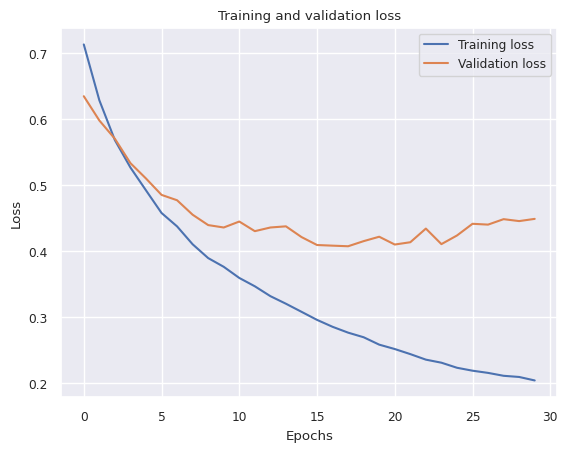

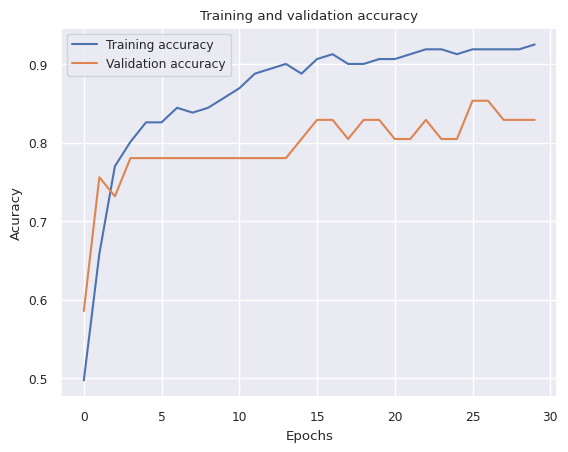

In [ ]:
plt.plot(model_heart.history['loss'], label='Training loss')
plt.plot(model_heart.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_heart.history['accuracy'], label='Training accuracy')
plt.plot(model_heart.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend()
plt.show()

## Guardamos el modelo

In [ ]:
model.save('classification_model_heart.keras')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
pretrained_model = load_model('classification_model_heart.keras')

## Utilizar el modelo para realizar predicciones

In [ ]:
prediction = pretrained_model.predict(X_test_scaled[7:8]) # X_test_flatten[7]
print(prediction)

1/1 [==============================] - 0s 87ms/step
[[0.08207359]]


In [ ]:
predicciones = pretrained_model.predict(X_test_scaled)
predicciones = (predicciones >0.5).astype('int32')
print(predicciones)

4/4 [==============================] - 0s 4ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


### Visualización de valores reales vs predichos

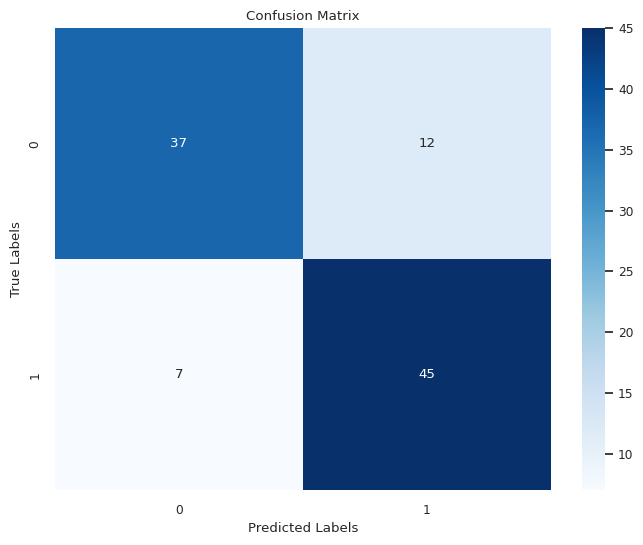

In [ ]:
from sklearn.metrics import confusion_matrix


# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Comparar métricas

## Volvemos a entrenar uno de los modelos que utilizamos en prácticas anteriores

In [ ]:
# Create a SVC object
from sklearn.svm import SVC
classifierSVC = SVC(kernel = "rbf", probability=True, random_state = 0)
classifierSVC.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

## Y realizamos predicciones

In [ ]:
y_pred_SVC  = classifierSVC.predict(X_test_scaled)
print(y_pred_SVC)
print(y_test)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0]
225    0
152    1
228    0
201    0
52     1
      ..
247    0
288    0
156    1
297    0
252    0
Name: output, Length: 101, dtype: int64


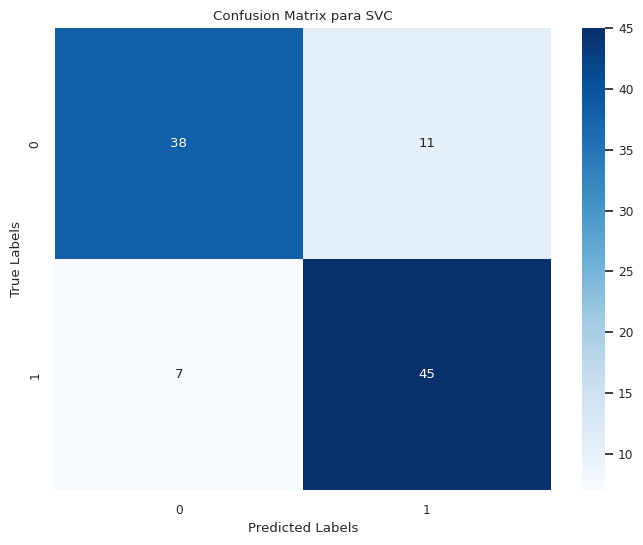

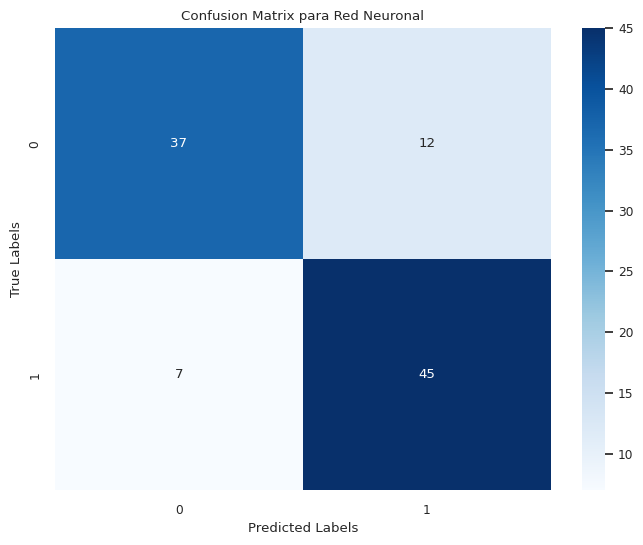

In [ ]:
from sklearn.metrics import confusion_matrix


# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm_svc = confusion_matrix(y_test, y_pred_SVC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix para SVC')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix para Red Neuronal')
plt.show()

Observamos que en este caso, obtenemos un resultado muy ligeramente mejor con una máquina de soporte vectorial, que con la red neuronal, seguramente debido a que nuestro dataset es muy reducido, y las redes neuronales tienden a funcionar mejor con volúmenes de datos grandes

# Red neuronal para regresión


## Preprocesado del dataset

### Importamos el dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
res = california_housing.frame[california_housing.frame < 1 ].count()

# Display result
print("Result:\n",res)

Result:
 MedInc           155
HouseAge           0
AveRooms           2
AveBedrms       4395
Population         0
AveOccup           3
Latitude           0
Longitude      20640
MedHouseVal     3596
dtype: int64


Antes de continuar, me he dado cuenta de que al estar el valor medio de las casas, representado en cientos de miles de dolares, cuando le paso la función logaritmo para normalizar, los valores que están entre 0 y 1 se vuelven negativos, y esto no es deseable a la hora de realizar predicciones sobre los valores que nos devuelve el modelo, ni al pasar los datos por el modelo, asi que para solucionarlo voy a multiplicar la columna 'MedHouseVal' por 10, así los valores entre 0 y 1 pasarán a estar entre 1 y 10, y no supondrán un problema.

Esto también es aplicable a las columnas MedInc, AveRooms, AveBedrms, y AveOccup, ya que son medias de valores, así que también aplicaremos este arreglo a esas columnas

In [ ]:
california_housing.frame['MedInc'] = 10*(california_housing.frame['MedInc'])
california_housing.frame['AveRooms'] = 10*(california_housing.frame['AveRooms'])
california_housing.frame['AveBedrms'] = 10*(california_housing.frame['AveBedrms'])
california_housing.frame['AveOccup'] = 10*(california_housing.frame['AveOccup'])
california_housing.frame['MedHouseVal'] = 10*(california_housing.frame['MedHouseVal'])

Tenemos que tener en cuenta que debido a esto, más adelante vamos a tener que dividir estas columnas entre 10, si queremos volver a interpretar los resultados en la misma magnitud en la que se encontraban originalmente

Cabe añadir, que al haber hecho esta transformación en todas nuestras filas, la correlacionn entre unas y otras queda igual, asi que no debería causar ningun problema en este sentido

### Manejo de datos missing

In [ ]:
california_housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No tenemos ningun dato null en el dataset, por lo que no es necesario ningun tipo de manejo de datos missing

### Manejo de datos categóricos

En este caso, nuestro dataset no contiene datos categóricos, asi que no aplica su manejo

### Estandarizacion y normalizacion de datos

In [ ]:
california_df = california_housing.frame

Empezamos con una representacion general de todos los datos

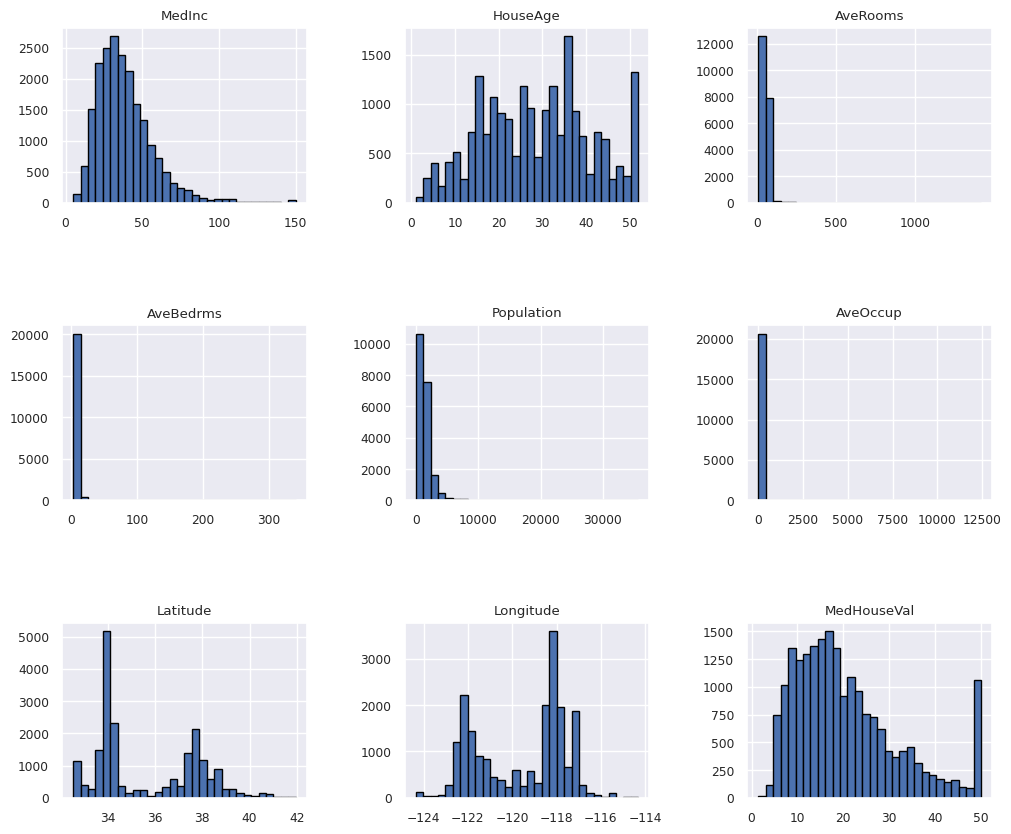

In [ ]:
california_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Realizamos las transformaciones que mejoran la skewness y kurtosis de nuestros datos

In [ ]:
california_df['MedInc'] = np.log(california_df['MedInc'])
california_df['AveBedrms'] = np.log(california_df['AveBedrms'])
california_df['Population'] = np.log(california_df['Population'])
california_df['AveRooms'] = np.log(california_df['AveRooms'])
california_df['AveOccup'] = np.log(california_df['AveOccup'])
california_df['MedHouseVal'] = np.log(california_df['MedHouseVal'])

In [ ]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.421872,41.0,4.246225,2.326116,5.774552,3.240855,37.88,-122.23,3.812424
1,4.419009,21.0,4.133267,2.274063,7.783641,3.049198,37.86,-122.22,3.579344
2,4.284607,52.0,4.417410,2.373459,6.206576,3.333011,37.85,-122.24,3.561330
3,4.033019,52.0,4.063430,2.373099,6.324359,3.237872,37.85,-122.25,3.530177
4,3.649671,52.0,4.140250,2.380547,6.336826,3.082583,37.85,-122.25,3.532810
...,...,...,...,...,...,...,...,...,...
20635,2.747463,25.0,3.921073,2.427748,6.739337,3.242829,39.48,-121.09,2.055405
20636,3.241342,18.0,4.113172,2.577022,5.874931,3.441317,39.49,-121.21,2.042518
20637,2.833213,17.0,3.952309,2.415996,6.914731,3.146578,39.43,-121.22,2.222459
20638,2.927025,18.0,3.975845,2.461228,6.608001,3.055514,39.43,-121.32,2.136531


### Separar datos en conjuntos de entrenamiento y test

In [ ]:
X = california_df.iloc[:, :8].values
y = california_df.iloc[:, 8:].values

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


[[   3.92911608   37.            3.96671592 ...    3.26328058
    34.23       -118.25      ]
 [   4.24756624   22.            4.2460129  ...    3.18886689
    34.14       -118.82      ]
 [   3.58415762   37.            3.75255751 ...    3.52564071
    34.3        -118.43      ]
 ...
 [   3.46501689   31.            3.59490426 ...    2.88555384
    36.58       -121.9       ]
 [   4.03096093   34.            3.81564388 ...    3.11256519
    33.62       -117.93      ]
 [   2.63059304   15.            3.67110497 ...    3.53696341
    32.8        -115.56      ]]
[[   3.72612707   22.            4.03655173 ...    3.73303819
    32.58       -117.05      ]
 [   4.05691957   32.            4.11205777 ...    3.40816605
    33.92       -117.97      ]
 [   3.77246204   29.            4.0827293  ...    3.37077678
    38.65       -121.84      ]
 ...
 [   3.73239382   10.            4.06351598 ...    3.6384486
    34.03       -117.64      ]
 [   2.78012277   41.            3.57283522 ...    3.2470467

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_train_scaled = scaler_simple.fit_transform(X_train)
X_test_scaled = scaler_simple.transform(X_test)
X_train_scaled
X_train_scaled
print(X_train_scaled)
print(X_test_scaled)

[[ 0.81376605  0.66264353  0.05819682 ... -0.30024111 -0.65353968
   0.65675917]
 [ 1.49023753 -0.52702997  1.08142178 ... -0.57187503 -0.69564613
   0.37248421]
 [ 0.08098399  0.66264353 -0.72638821 ...  0.6574578  -0.62079023
   0.56698813]
 ...
 [-0.1721021   0.18677413 -1.30396247 ... -1.6790653   0.44590636
  -1.16359802]
 [ 1.03011116  0.42470883 -0.49526669 ... -0.8504008  -0.93892781
   0.81635213]
 [-1.94463677 -1.08221094 -1.02479558 ...  0.6987893  -1.3225643
   1.99833749]]
[[ 0.38256425 -0.52702997  0.31404544 ...  1.41452536 -1.42549116
   1.25523277]
 [ 1.08525411  0.2660857   0.59066735 ...  0.22863748 -0.79857299
   0.79640301]
 [ 0.48099187  0.028151    0.48322035 ...  0.09215463  1.41435458
  -1.13367434]
 ...
 [ 0.39587648 -1.47876878  0.41283094 ...  1.0692429  -0.74710956
   0.96098325]
 [-1.62699648  0.9798898  -1.38481402 ... -0.3595      1.01668261
  -1.33815282]
 [-1.01792788 -0.60634154 -0.16779418 ... -0.41431815  1.45178253
  -1.52268218]]


## Construcción de red neuronal con Keras

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
n_cols = X.shape[1]
n_cols

8

In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# compile model
# model.compile(optimizer='adam', loss='mean_squared_error')
# JG: include metrics parameter for accuracy evaluation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [ ]:
# summarizy the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                450       
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3051 (11.92 KB)
Trainable params: 3051 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    # compile model
    # model.compile(optimizer='adam', loss='mean_squared_error')
    # include metrics parameter for accuracy evaluation
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

In [ ]:
# build the model
model = regression_model()

## Entrenar el modelo

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
301/301 - 3s - loss: 0.4422 - mse: 0.4422 - val_loss: 0.1106 - val_mse: 0.1106 - 3s/epoch - 9ms/step
Epoch 2/100
301/301 - 2s - loss: 0.0933 - mse: 0.0933 - val_loss: 0.0909 - val_mse: 0.0909 - 2s/epoch - 5ms/step
Epoch 3/100
301/301 - 2s - loss: 0.0814 - mse: 0.0814 - val_loss: 0.0867 - val_mse: 0.0867 - 2s/epoch - 6ms/step
Epoch 4/100
301/301 - 1s - loss: 0.0761 - mse: 0.0761 - val_loss: 0.0820 - val_mse: 0.0820 - 786ms/epoch - 3ms/step
Epoch 5/100
301/301 - 1s - loss: 0.0722 - mse: 0.0722 - val_loss: 0.0807 - val_mse: 0.0807 - 837ms/epoch - 3ms/step
Epoch 6/100
301/301 - 1s - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0776 - val_mse: 0.0776 - 778ms/epoch - 3ms/step
Epoch 7/100
301/301 - 1s - loss: 0.0675 - mse: 0.0675 - val_loss: 0.0763 - val_mse: 0.0763 - 895ms/epoch - 3ms/step
Epoch 8/100
301/301 - 1s - loss: 0.0660 - mse: 0.0660 - val_loss: 0.0744 - val_mse: 0.0744 - 761ms/epoch - 3ms/step
Epoch 9/100
301/301 - 1s - loss: 0.0643 - mse: 0.0643 - val_loss: 0.0728 - val_ms

# Visualizamos la función de perdida y error cuadrático medio

In [ ]:
print(history.history.keys())
print(history)

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


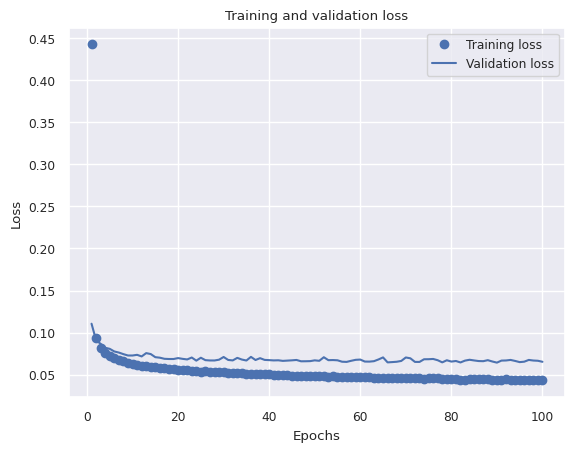

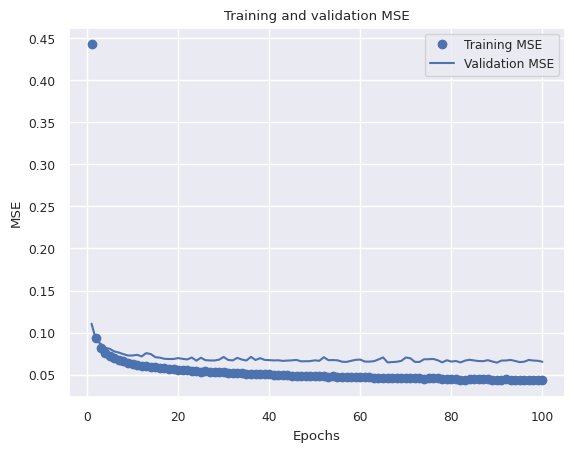

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

train_mse_values = history_dict['mse']
val_mse_values = history_dict['val_mse']

# epochs = range(1, len(acc) + 1)
epochs = range(1, 101)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, train_mse_values, 'bo', label='Training MSE')
plt.plot(epochs, val_mse_values, 'b', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.show()

# Utilizar el modelo para realizar predicciones

In [ ]:
precio_predicho = model.predict(X_test_scaled)

215/215 [==============================] - 1s 5ms/step


## Visualización de valores reales vs predichos


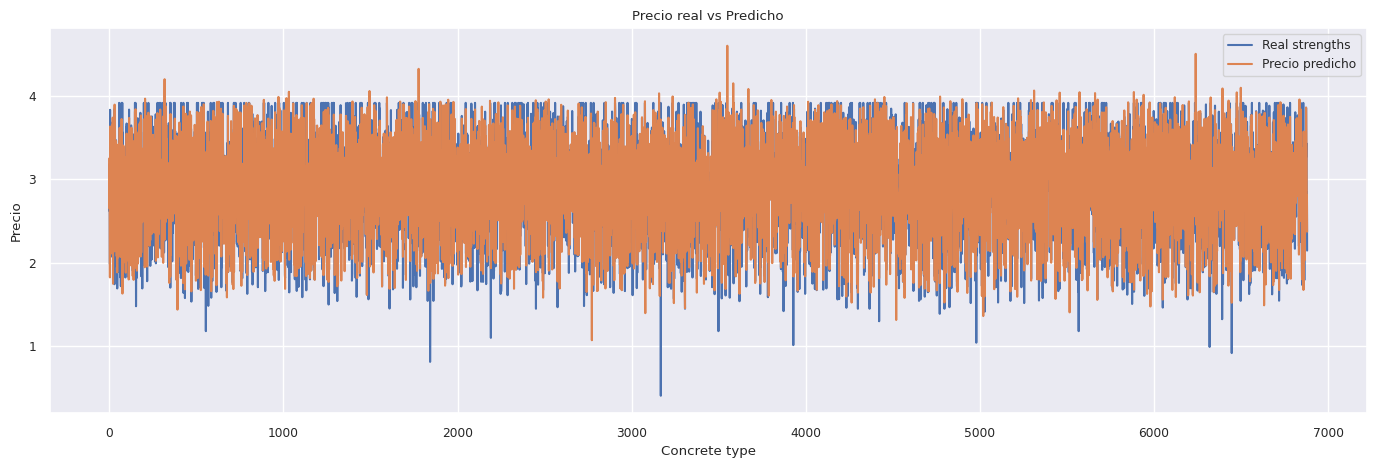

In [ ]:
# plot real concrete strengths vs predicted strengths
from matplotlib import pyplot as plt

plt.figure(figsize=(17,5))
plt.plot(y_test, label='Real strengths')
plt.plot(precio_predicho, label='Precio predicho')
plt.title('Precio real vs Predicho')
plt.xlabel('Concrete type')
plt.ylabel('Precio')
plt.legend()
plt.show()

Observamos que en general, el modelo predice valores muy parecidos a los reales

# Comparación de métricas con las obtenidas en trabajos anteriores

Reentrenamos la máquina de soporte vectorial que utilizamos en prácticas anteriores

In [ ]:
from sklearn.svm import SVR
SVRregression = SVR(kernel = "rbf")
SVRregression.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Y volvemos a realizar predicciones

In [ ]:
import sklearn.metrics as metrics
# Make predictions using the testing set
y_pred = SVRregression.predict(X_test_scaled)

A continuación, comparamos la diferencia entre los resultados de un modelo y otro

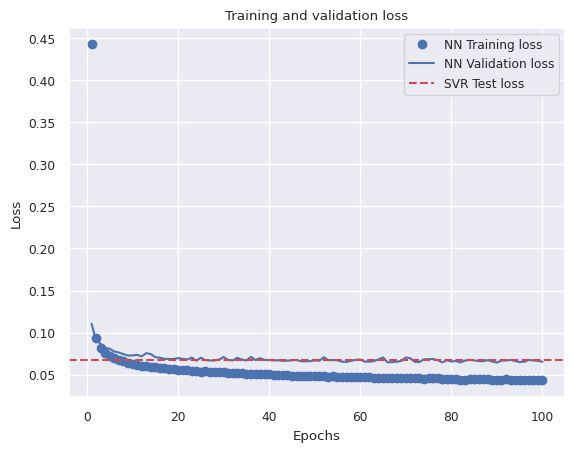

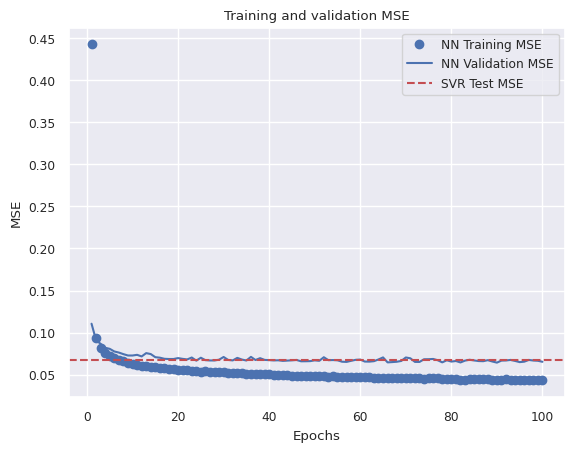

In [ ]:
# Plot loss for neural network model
history_dict = history.history
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(train_loss_values) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='NN Training loss')
plt.plot(epochs, val_loss_values, 'b', label='NN Validation loss')

# Plot loss for SVR model
svr_loss = metrics.mean_squared_error(y_test, y_pred)
plt.axhline(y=svr_loss, color='r', linestyle='--', label='SVR Test loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MSE for neural network model
train_mse_values = history_dict['mse']
val_mse_values = history_dict['val_mse']

plt.plot(epochs, train_mse_values, 'bo', label='NN Training MSE')
plt.plot(epochs, val_mse_values, 'b', label='NN Validation MSE')

# Plot MSE for SVR model
svr_mse = metrics.mean_squared_error(y_test, y_pred)
plt.axhline(y=svr_mse, color='r', linestyle='--', label='SVR Test MSE')

plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


Como podemos observar, la red neuronal empieza a funcionar mejor que la máquina de soprte vectorial cerca de las primeras 10 épocas, sacándole mucha ventaja de ese punto en adelante